# Proyecto parte 1

## Introducción 

## Elección de activos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import random
from sklearn import linear_model

In [2]:
# Get tickers 
tickers = ['TSLA','AAPL','GOOGL','XOM','SHEL','CVX','PEP','CALM','TSN','PFE','CVS','UNH','TQQQ','VOO','SQQQ', 'VTI']
start_date = '2015-01-01'
end_date = "2023-01-01"

# Descargar precios y graficar
St = yf.download(tickers, start=start_date, end = end_date)['Close']
St.head()
rt = St.pct_change().dropna()
rt

[*********************100%***********************]  16 of 16 completed


,AAPL,CALM,CVS,CVX,GOOGL,PEP,PFE,SHEL,SQQQ,TQQQ,TSLA,TSN,UNH,VOO,VTI,XOM
Date,,,,,,,,,,,,,,,,
2015-01-05 00:00:00-05:00,-0.028172,-0.022251,-0.009884,-0.039972,-0.019054,-0.007518,-0.005426,-0.047477,0.049284,-0.045008,-0.042041,-0.023029,-0.016471,-0.017569,-0.017183,-0.027362
2015-01-06 00:00:00-05:00,0.000094,-0.035724,0.000743,-0.000463,-0.024679,-0.007575,0.008344,-0.012226,0.036814,-0.039653,0.005664,0.005893,-0.002018,-0.009833,-0.009798,-0.005316
2015-01-07 00:00:00-05:00,0.014022,0.022777,0.018041,-0.000833,-0.002941,0.029241,0.013686,0.011584,-0.037037,0.038470,-0.001562,0.012226,0.010210,0.012495,0.011932,0.010133
2015-01-08 00:00:00-05:00,0.038422,0.023075,0.021266,0.022883,0.003484,0.018174,0.020408,0.020235,-0.058487,0.057034,-0.001564,0.036739,0.047733,0.017568,0.017640,0.016645
2015-01-09 00:00:00-05:00,0.001073,-0.011540,-0.000510,-0.019926,-0.012211,-0.006771,0.004615,-0.012608,0.019581,-0.020247,-0.018802,-0.020631,-0.009360,-0.008421,-0.008290,-0.001410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,-0.002798,0.024572,0.001713,0.030916,0.016750,0.006461,0.003679,0.018329,-0.004651,0.002851,-0.017551,0.007720,0.008006,0.005601,0.005516,0.026445
2022-12-27 00:00:00-05:00,-0.013878,-0.013152,-0.005772,0.012571,-0.020621,0.004444,-0.013506,0.001558,0.043178,-0.042638,-0.114089,0.005542,0.001280,-0.003979,-0.004179,0.013894
2022-12-28 00:00:00-05:00,-0.030685,-0.024929,-0.002795,-0.014753,-0.015677,-0.007210,-0.006454,-0.022637,0.040495,-0.040380,0.033089,-0.008105,-0.006654,-0.012269,-0.012590,-0.016426


###  - Normalizar

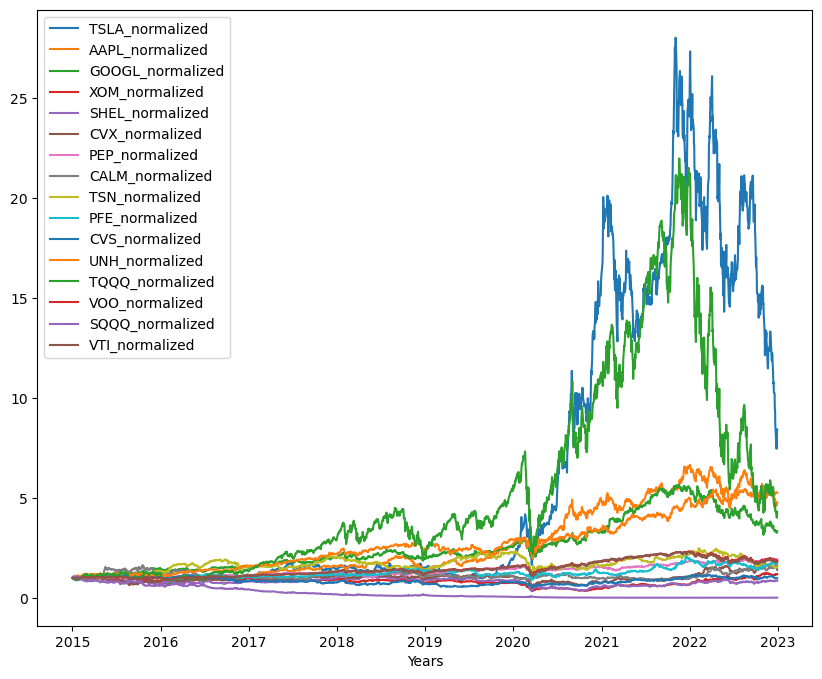

In [3]:
# Normalizamos todos los activos 
normalized = St.copy()
for i in tickers:
    normalized[i+'_normalized'] = St[i]/St[i].iloc[0]

# Veamos la normalización 
normalized = normalized[['TSLA_normalized','AAPL_normalized','GOOGL_normalized',
            'XOM_normalized','SHEL_normalized','CVX_normalized',
            'PEP_normalized','CALM_normalized','TSN_normalized',
            'PFE_normalized','CVS_normalized','UNH_normalized',
            'TQQQ_normalized','VOO_normalized','SQQQ_normalized', 'VTI_normalized']]
#Graficamos
plt.figure(figsize=(10,8))
plt.plot(normalized)
plt.xlabel('Years')
plt.legend(normalized)
plt.show()

## Market Beta, R2, Promedio Acción

In [4]:
import warnings
warnings.filterwarnings('ignore')

betas = {}
for i in tickers : 
    if i != 'VTI' :
        flag_df = rt[[i, 'VTI']]
        y = flag_df[[i]]
        X = flag_df[['VTI']]
        
        # Calculo de beta
        model = LinearRegression()
        model.fit(X, y)
        beta = model.coef_[0][0]
    
        # Calculo de r2
        predictions = model.predict(X)
        promedio = np.mean(y)
    
        var_predictions = np.var(y - predictions)
        var_promedio = np.var(y - promedio)
        r2 = (var_promedio - var_predictions) / var_promedio
    
        # Promedio acción
        promedio_accion = np.mean(y)
    
        # Agregamos todo al jason de betas y anualizamos
        betas[i] = [beta, r2[0], promedio_accion[0] * 252]

betas

NameError: name 'LinearRegression' is not defined

In [40]:
i = 'VTI'
y = flag_df[[i]]
X = flag_df[['VTI']]
model = LinearRegression()
model.fit(X,y)
model.coef_[0][0]

1.0

In [41]:
df = pd.DataFrame()
df['betas'] = [betas[i][0] for i in betas]
df['r2'] = [betas[i][1] for i in betas]
df['rendimiento'] = [betas[i][2] for i in betas]
df['accion'] = [i for i in betas]
df

,betas,r2,rendimiento,accion
0,1.455381,0.232246,0.451791,TSLA
1,1.177684,0.560801,0.260100,AAPL
2,1.113845,0.541229,0.205617,GOOGL
3,0.901349,0.342592,0.069790,XOM
4,0.967852,0.308329,0.042883,SHEL
5,1.031920,0.391984,0.097866,CVX
6,0.631094,0.387592,0.102497,PEP
7,0.433269,0.062763,0.084072,CALM
8,0.641204,0.175909,0.092761,TSN
9,0.611587,0.248148,0.060626,PFE


### - BootStrap R2 y Beta

### - Analisis de la acción